# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ushape.csv')
df.head()

,x,y,Class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


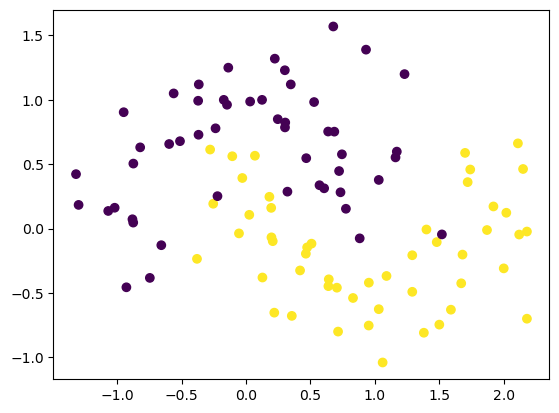

In [11]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
plt.scatter(x[:,0], x[:,1], c=y)

<Axes: >

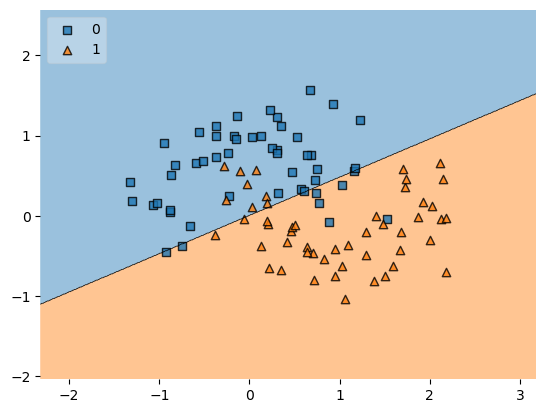

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), lr, legend=2)

In [17]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, x, y, scoring='accuracy', cv=10))

0.8300000000000001

# Polynomial Logistic Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
def plot_decision_boundary(X, y, degree=1):
    poly = PolynomialFeatures(degree=3, include_bias=False)
    x_trans = poly.fit_transform(X)
    lr = LogisticRegression()
    lr.fit(x_trans, y)
    accuracy = np.mean(cross_val_score(lr, x_trans, y, scoring='accuracy', cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
    XX,YY=np.meshgrid(a,b)
    input_array=np.array([XX.ravel(),YY.ravel()]).T
    labels=lr.predict(poly.transform(input_array))    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

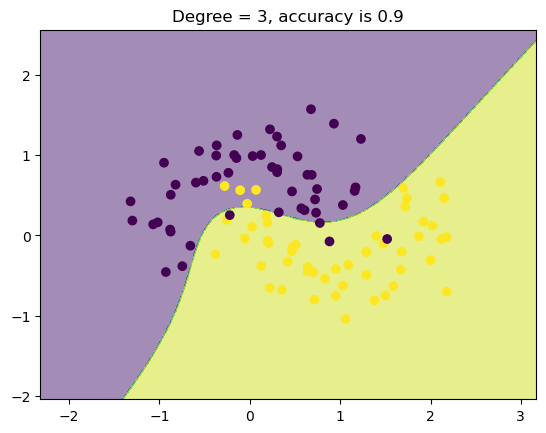

In [51]:
plot_decision_boundary(x,y, 3)